In [1]:
import sys, os
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

from functions import *

%load_ext autoreload
%autoreload 2

In [98]:
(X_train, y_train),(X_test, y_test),_ = make_data(1000)
X_train, X_test = X_train.reshape(-1,1), X_test.reshape(-1,1)
y_train, y_test = y_train.reshape(-1,1), y_test.reshape(-1,1)

Learning rate: 0.001, Layers: 0.001, MSE: 0.047473611397602665
Learning rate: 0.001, Layers: 0.001, MSE: 1.0379679234918735
Learning rate: 0.001, Layers: 0.001, MSE: 0.17767229452118813
Learning rate: 0.001, Layers: 0.001, MSE: 0.07414122244705362
Learning rate: 0.001, Layers: 0.001, MSE: 1.3421325306664134
Learning rate: 0.01, Layers: 0.01, MSE: 0.05686492372725883
Learning rate: 0.01, Layers: 0.01, MSE: 0.05744342181942093
Learning rate: 0.01, Layers: 0.01, MSE: 0.11715895387459295
Learning rate: 0.01, Layers: 0.01, MSE: 0.07461052131113326
Learning rate: 0.01, Layers: 0.01, MSE: 0.040248720534494
Learning rate: 0.1, Layers: 0.1, MSE: 0.0339081282553722
Learning rate: 0.1, Layers: 0.1, MSE: 0.01006838186816791
Learning rate: 0.1, Layers: 0.1, MSE: 0.0032708239296031145
Learning rate: 0.1, Layers: 0.1, MSE: 0.008354972922197876
Learning rate: 0.1, Layers: 0.1, MSE: 0.010951007044148435
Learning rate: 0.2, Layers: 0.2, MSE: 0.0565598079256271
Learning rate: 0.2, Layers: 0.2, MSE: 0.004

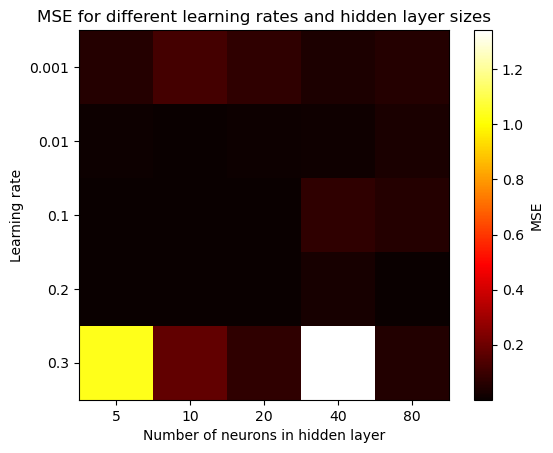

In [105]:
learning_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
layers_analysis = [5, 10, 20, 40, 80]
mses = np.zeros((len(learning_rate), len(layers_analysis)))
for i in learning_rate:
    for j in layers_analysis:
        reg_nn_gd = NeuralNetwork(1, [j, 1], [sigmoid, identity], [derivate(sigmoid), derivate(identity)], mse, mse_der)
        reg_nn_gd.train(X_train, y_train, epochs=20000, learning_rate=i)
        y_pred_nn_gd = reg_nn_gd._feed_forward(X_test)
        mse_val = reg_nn_gd.cost(y_test, y_pred_nn_gd)
        mses[learning_rate.index(i)-1, layers_analysis.index(j)-1] = mse_val
        print(f"Learning rate: {i}, Layers: {i}, MSE: {mse_val}")
plt.imshow(mses, cmap='hot', interpolation='nearest')
plt.xticks(ticks=np.arange(len(layers_analysis)), labels=layers_analysis)
plt.yticks(ticks=np.arange(len(learning_rate)), labels=learning_rate)
plt.xlabel("Number of neurons in hidden layer")
plt.ylabel("Learning rate")
plt.colorbar(label="MSE")
plt.title("MSE for different learning rates and hidden layer sizes")
plt.show()

In [106]:
mses

array([[5.74434218e-02, 1.17158954e-01, 7.46105213e-02, 4.02487205e-02,
        5.68649237e-02],
       [1.00683819e-02, 3.27082393e-03, 8.35497292e-03, 1.09510070e-02,
        3.39081283e-02],
       [4.02298422e-03, 9.42317464e-04, 3.57815239e-03, 7.71292123e-02,
        5.65598079e-02],
       [5.61157238e-04, 3.14531554e-03, 2.80898557e-03, 2.71660642e-02,
        8.51219556e-05],
       [1.03796792e+00, 1.77672295e-01, 7.41412224e-02, 1.34213253e+00,
        4.74736114e-02]])

In [59]:
poly = PolynomialFeatures(degree=8)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

theta = np.linalg.pinv(X_train_poly.T @ X_train_poly) @ X_train_poly.T @ y_train
y_pred = X_test_poly @ theta

In [93]:
reg_nn_gd_1layer = NeuralNetwork(1, [50, 1], [sigmoid, identity], [derivate(sigmoid), derivate(identity)], mse, mse_der)
reg_nn_gd_2layer = NeuralNetwork(1, [50, 100, 1], [sigmoid, sigmoid, identity], [derivate(sigmoid), derivate(sigmoid), derivate(identity)], mse, mse_der)

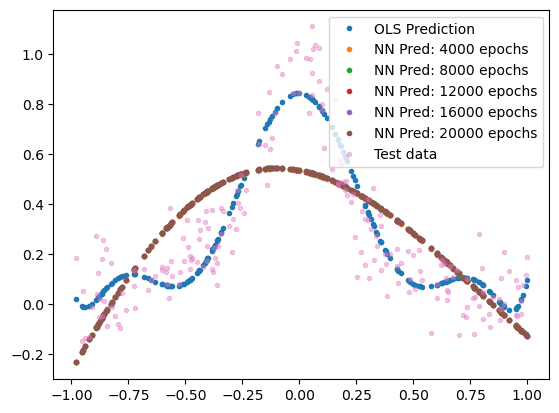

In [95]:
epochs = 4000

plt.plot(X_test,y_pred, ".",  label="OLS Prediction")
# plt.plot(X_test,y_pred_nn_adam, ".", label="NN Adam Prediction")
# plt.plot(X_test, y_pred_nn_RMSProp, ".", label="NN RMSProp Prediction")
for i in range(5):
    reg_nn_gd_1layer.train(X_train, y_train, epochs=epochs, learning_rate=0.01)
    y_pred_nn_gd = reg_nn_gd_1layer._feed_forward(X_test)
    plt.plot(X_test, y_pred_nn_gd, ".", label=f"NN Pred: {(i+1)*epochs} epochs")
plt.plot(X_test, y_test, ".", label="Test data", alpha = 0.4)
plt.legend()

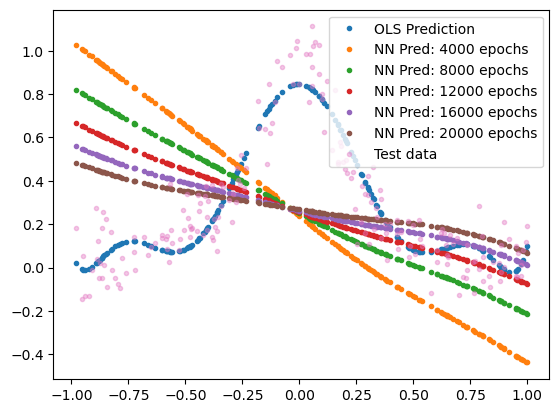

In [97]:
epochs = 4000

plt.plot(X_test,y_pred, ".",  label="OLS Prediction")
# plt.plot(X_test,y_pred_nn_adam, ".", label="NN Adam Prediction")
# plt.plot(X_test, y_pred_nn_RMSProp, ".", label="NN RMSProp Prediction")
for i in range(5):
    reg_nn_gd_2layer.train(X_train, y_train, epochs=epochs, learning_rate=0.01)
    y_pred_nn_gd = reg_nn_gd_2layer._feed_forward(X_test)
    plt.plot(X_test, y_pred_nn_gd, ".", label=f"NN Pred: {(i+1)*epochs} epochs")
plt.plot(X_test, y_test, ".", label="Test data", alpha = 0.4)
plt.legend()

In [ ]:
y_pred_nn_gd = reg_nn_gd_2layer._feed_forward(X_test)
y_pred_nn_gd

array([[ 7.60427068e-01],
       [ 1.67491795e-01],
       [ 1.59731932e-01],
       [ 4.05899907e-01],
       [ 6.35658106e-01],
       [ 3.45464567e-01],
       [ 5.20044014e-01],
       [ 7.65773611e-01],
       [-5.23175101e-03],
       [ 3.64595750e-02],
       [ 2.60434150e-02],
       [ 4.54010172e-02],
       [ 4.86943946e-01],
       [ 9.49020115e-02],
       [ 4.14815701e-02],
       [ 4.30801816e-03],
       [ 2.23809853e-01],
       [-3.19613032e-03],
       [ 1.09876270e-01],
       [ 3.37675521e-01],
       [ 7.24332433e-01],
       [ 5.16629127e-02],
       [ 5.10857763e-01],
       [ 7.54921751e-01],
       [ 8.67381047e-02],
       [ 1.24911147e-01],
       [ 3.77930873e-02],
       [ 1.18897424e-01],
       [ 6.23923948e-03],
       [ 5.35445955e-02],
       [ 4.26565881e-01],
       [ 3.69633522e-02],
       [ 5.36302238e-01],
       [ 7.69502787e-01],
       [ 5.07517934e-01],
       [ 7.25510857e-02],
       [ 3.15891252e-01],
       [ 6.46427565e-01],
       [ 5.5